<a href="https://colab.research.google.com/github/Jyoti1706/Data-Science-Project/blob/master/ML_Sys_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Function defination for Vanilla Gradient Descent Alogithm

# ---------------------------------------- #
# Gradient descent function without  momentum
# Formula : theta = theta - eta * grad
# ---------------------------------------- #
def gradient_descent(X, y, theta, learning_rate=0.02, num_iterations=1000):
    m = len(y)
    J_history = []
    theta_history = []

    for i in range(num_iterations):
        gradient = (1/m) * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradient

        J = (1/(2*m)) * np.sum((X.dot(theta) - y)**2)
        J_history.append(J)
        theta_history.append(theta.copy())

        if i % 100 == 0:
            print(f"Iteration {i+1}: Cost {J}")

    return theta, J_history, theta_history


### 1. Correctly initializes velocity parameters.

In [ ]:
# 1. Correctly initializes velocity parameters.
def initialize_velocity(theta):
    vel = np.zeros_like(theta)
    return vel

# Function defination for Gradient Descent Alogithm with Momentum
# ---------------------------------------- #
# Gradient descent function with momentum
# Formula : Vt = Gama * Vt + eta * grad
#           Theta = Theta - Vt
# ---------------------------------------- #
def gradient_descent_with_momentum(X, y, theta, learning_rate=0.02, momentum=0.9, num_iterations=1000):
    m = len(y)
    #v = np.zeros_like(theta)
    v = initialize_velocity(theta)
    J_history = []
    theta_history = []

    for i in range(num_iterations):
        gradient = (1/m) * X.T.dot(X.dot(theta) - y)
        v = momentum * v + learning_rate * gradient
        theta = theta - v

        J = (1/(2*m)) * np.sum((X.dot(theta) - y)**2)
        J_history.append(J)
        theta_history.append(theta.copy())

        if i % 100 == 0:
            print(f"Iteration {i+1}: Cost {J}")

    return theta, J_history, theta_history



In [ ]:
# ---------------------------------------- #
# Generation of synthetic dataset with higher dimensions
# ---------------------------------------- #
np.random.seed(42)
m = 500  # Number of examples
n = 2    # Number of features
X = 2 * np.random.rand(m, n)
true_theta = np.array([4, 3]).reshape(n, 1)
y = X.dot(true_theta) + np.random.randn(m, 1)

# Add a bias term to the input data
X_b = np.c_[np.ones((m, 1)), X]


In [ ]:
# ---------------------------------------- #
# Initialize parameters
# ---------------------------------------- #
theta = np.random.randn(n+1, 1)
learning_rate = 0.01
num_iterations = 250
momentum_coefficient = 0.5


# Different momentum coefficients and learning rates
momentum_coefficients = [0.5, 0.7, 0.8, 0.9, 0.99]
learning_rates = [0.01, 0.05, 0.07, 0.1, 0.5]



Iteration 1: Cost 25.071229019616684
Iteration 101: Cost 0.5234071127772382
Iteration 201: Cost 0.4839537485299098
Iteration 1: Cost 25.071229019616684
Iteration 101: Cost 0.48627229787694737
Iteration 201: Cost 0.4821641866244322
Iteration 1: Cost 25.071229019616684
Iteration 101: Cost 0.4822356619236496
Iteration 201: Cost 0.48214773245381176
Iteration 1: Cost 25.071229019616684
Iteration 101: Cost 0.48233701657372197
Iteration 201: Cost 0.4821477513703598
Iteration 1: Cost 25.071229019616684
Iteration 101: Cost 2.6682664599154626
Iteration 201: Cost 0.5959017296280109


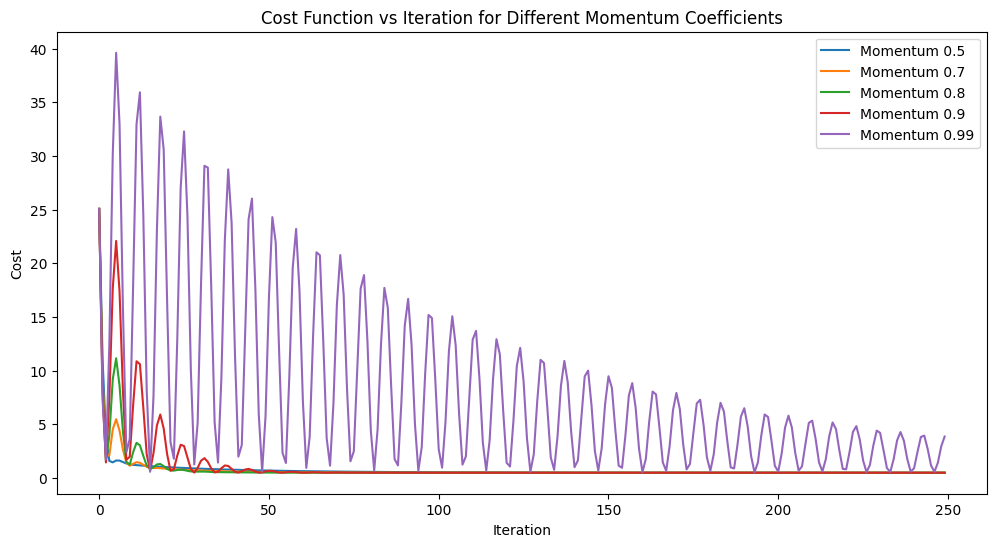

In [ ]:
# Plot cost function vs iteration for different momentum coefficients
plt.figure(figsize=(12, 6))
for momentum in momentum_coefficients:
    _, J_history_momentum, _ = gradient_descent_with_momentum(X_b, y, np.copy(theta), learning_rate=0.07, momentum=momentum, num_iterations=num_iterations)
    plt.plot(J_history_momentum, label=f'Momentum {momentum}')

plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.title("Cost Function vs Iteration for Different Momentum Coefficients")
plt.show()



Iteration 1: Cost 37.97532358490938
Iteration 101: Cost 1.351629188224505
Iteration 201: Cost 1.117679065260218
Iteration 1: Cost 29.061390474176953
Iteration 101: Cost 0.7974774563688034
Iteration 201: Cost 0.5866089763377437
Iteration 1: Cost 25.071229019616684
Iteration 101: Cost 0.6830305231525229
Iteration 201: Cost 0.5252967397449324
Iteration 1: Cost 19.669493213783696
Iteration 101: Cost 0.5848368004198811
Iteration 201: Cost 0.4935768988548578
Iteration 1: Cost 14.555080251528466
Iteration 101: Cost 0.4821589901593768
Iteration 201: Cost 0.482147727691872


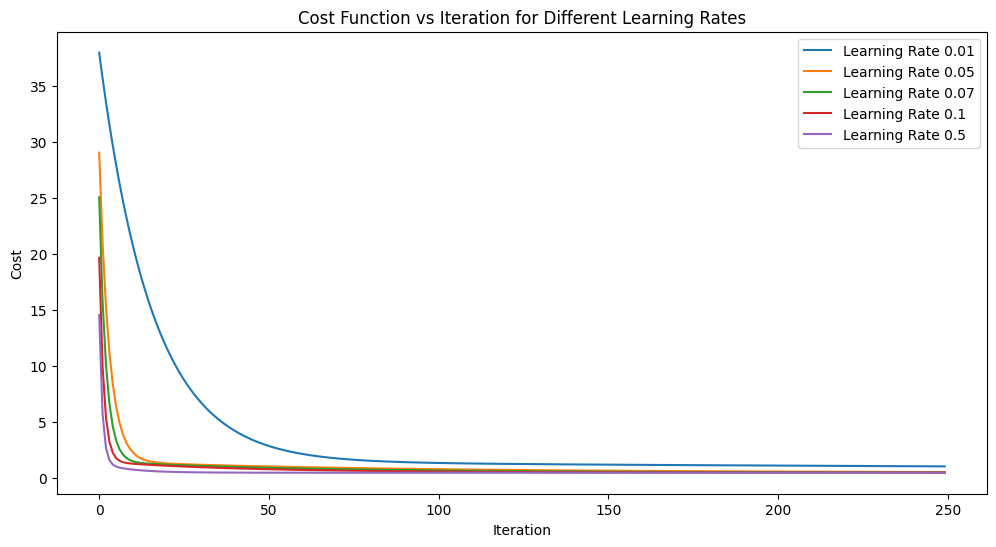

In [ ]:
# Plot cost function vs iteration for different learning rates
plt.figure(figsize=(12, 6))
for lr in learning_rates:
    _, J_history_lr, _ = gradient_descent(X_b, y, np.copy(theta), learning_rate=lr, num_iterations=num_iterations)
    plt.plot(J_history_lr, label=f'Learning Rate {lr}')

plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.title("Cost Function vs Iteration for Different Learning Rates")
plt.show()

In [ ]:
# ---------------------------------------- #
# Re-Initialize parameters
# ---------------------------------------- #
theta = np.random.randn(n+1, 1)
learning_rate = 0.07
num_iterations = 250
momentum_coefficient = 0.8


### 2. Properly integrates momentum into the parameter updates

In [ ]:
# 2. Properly integrates momentum into the parameter updates
# ---------------------------------------- #
# Run gradient descent without momentum
# ---------------------------------------- #
theta_no_momentum, J_history_no_momentum, theta_history_no_momentum = gradient_descent(X_b, y, np.copy(theta), learning_rate, num_iterations)

# ---------------------------------------- #
# Run gradient descent with momentum
# ---------------------------------------- #
theta_with_momentum, J_history_with_momentum, theta_history_with_momentum = gradient_descent_with_momentum(X_b, y, np.copy(theta), learning_rate, momentum_coefficient, num_iterations)




Iteration 1: Cost 25.071229019616684
Iteration 101: Cost 0.6830305231525229
Iteration 201: Cost 0.5252967397449324
Iteration 1: Cost 25.071229019616684
Iteration 101: Cost 0.4822356619236496
Iteration 201: Cost 0.48214773245381176


### 3. Provides a clear explanation of the momentum concept.

Gradient descent is an optimization algorithm that follows the negative gradient of an objective function in order to locate the minimum of the function.

A *problem with gradient descent* is that it can bounce around the search space on optimization problems that have large amounts of curvature or noisy gradients, and it can get stuck in flat spots in the search space that have no gradient.

**Momentum** is an extension to the gradient descent optimization algorithm that allows the search to build inertia in a direction in the search space and overcome the oscillations of noisy gradients and coast across flat spots of the search space.

**Momentum** involves adding an additional hyperparameter that controls the amount of history (momentum) to include in the update equation, i.e. the step to a new point in the search space. The value for the hyperparameter is defined in the range 0.0 to 1.0 and often has a value close to 1.0, such as 0.8, 0.9, or 0.99. A momentum of 0.0 is the same as gradient descent without momentum.

**Momentum** involves maintaining the change in the position and using it in the subsequent calculation of the change in position.

If we think of updates over time, then the update at the current iteration or time (t) will add the change used at the previous time (t-1) weighted by the momentum hyperparameter, as follows:


>change_x(t) = step_size * f'(x(t-1)) + momentum * change_x(t-1)

The update to the position is then performed as before.

>x(t) = x(t-1) – change_x(t)

The change in the position accumulates magnitude and direction of changes over the iterations of the search, proportional to the size of the momentum hyperparameter.

For example, a large momentum (e.g. 0.9) will mean that the update is strongly influenced by the previous update, whereas a modest momentum (0.2) will mean very little influence.

### 4. Compares with standard gradient descent showing convergence speed

In [ ]:
# 4. Compares with standard gradient descent showing convergence speed

# ---------------------------------------- #
# Create a grid of parameter values or a range for display
# ---------------------------------------- #
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 5, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))



In [ ]:
# ---------------------------------------- #
# Compute the cost function for each point on the grid
# ---------------------------------------- #
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        t = np.array([[theta0], [theta1], [theta1]])
        J_vals[i, j] = (1/(2*len(y))) * np.sum((X_b.dot(t) - y)**2)

theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)


Text(0.5, 1.0, 'Contour Plot of Cost Function')

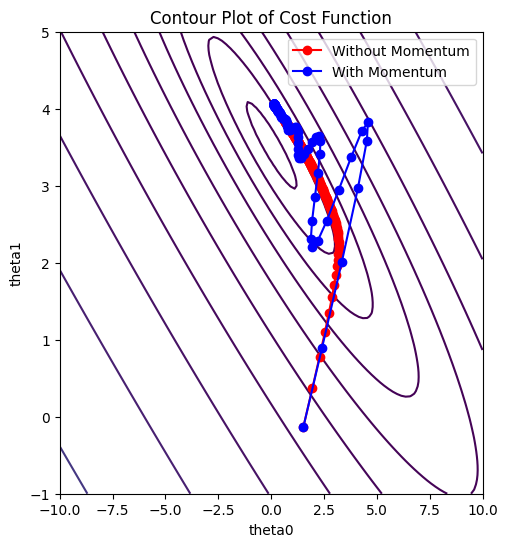

In [ ]:
# ---------------------------------------- #
# Plot the contour of the cost function
# ---------------------------------------- #
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.contour(theta0_vals, theta1_vals, J_vals.T, levels=np.logspace(-2, 3, 20), cmap='viridis')
plt.plot([t[0] for t in theta_history_no_momentum], [t[1] for t in theta_history_no_momentum], 'r-o', label='Without Momentum')
plt.plot([t[0] for t in theta_history_with_momentum], [t[1] for t in theta_history_with_momentum], 'b-o', label='With Momentum')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.legend()
plt.title('Contour Plot of Cost Function')


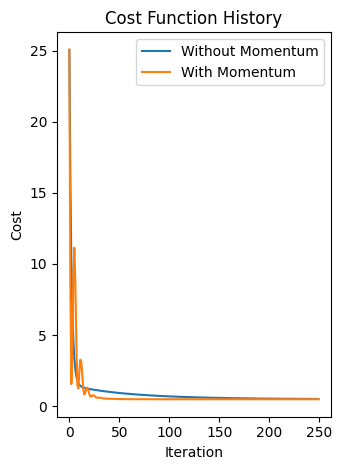

In [ ]:
# ---------------------------------------- #
# Plot the cost function history
# ---------------------------------------- #
plt.subplot(1, 2, 2)
plt.plot(J_history_no_momentum, label="Without Momentum")
plt.plot(J_history_with_momentum, label="With Momentum")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.title("Cost Function History")

plt.tight_layout()
plt.show()


### 5. Discusses the benefits of using momentum in terms of convergence acceleration